In [54]:
from waggle.data.audio import Microphone
import time
import datetime
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import bme680

In [20]:
microphone = Microphone()

sensor = bme680.BME680()
sensor.set_humidity_oversample(bme680.OS_2X)
sensor.set_pressure_oversample(bme680.OS_4X)
sensor.set_temperature_oversample(bme680.OS_8X)
sensor.set_filter(bme680.FILTER_SIZE_3)
sensor.set_gas_status(bme680.DISABLE_GAS_MEAS)
sensor.set_gas_heater_temperature(320)
sensor.set_gas_heater_duration(150)
sensor.select_gas_heater_profile(0)

In [21]:
def time_ns():
    return int(time.time() * 1e9)

In [26]:
def toDate(t):
    return datetime.datetime.fromtimestamp(t / 1e9)
vToDate = np.vectorize(toDate)

In [22]:
def getAudioSample(duration):
    sample = microphone.record(duration)
    sample.save("ACDetector.wav")
    (samplerate, data) = wavfile.read('ACDetector.wav')
    return data

In [44]:
def getTempSample(duration):
    enviData = []
    
    for i in range(1, duration):
        if sensor.get_sensor_data():
            reading = sensor.data.temperature
        else:
            reading = 0
            
        enviData = np.append(enviData, [reading], axis=0)
        time.sleep(1)
        
    return enviData

In [56]:
audioData = [[time_ns(),0]]
tempData = [[time_ns(),0]]

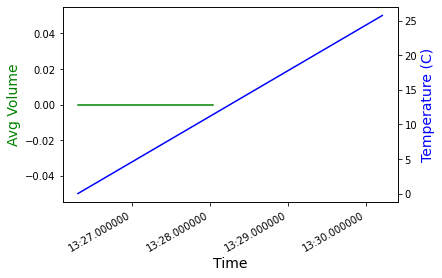

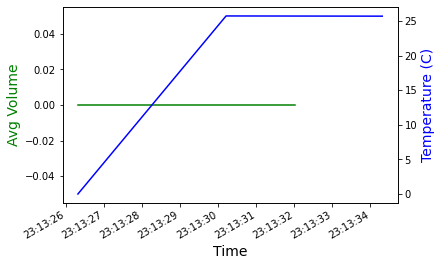

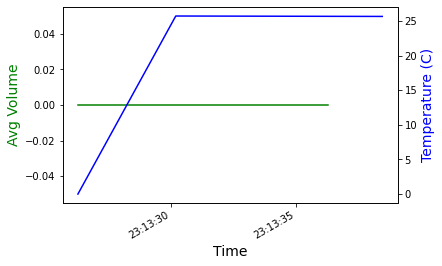

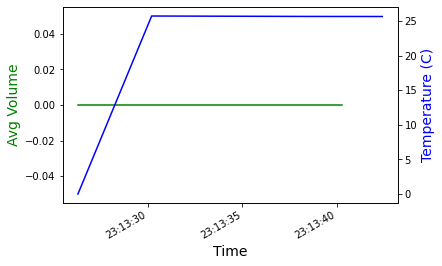

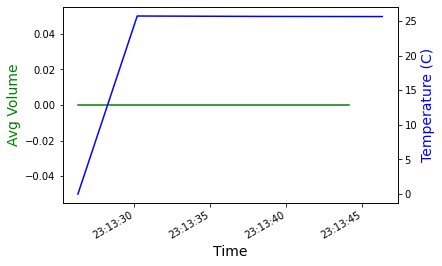

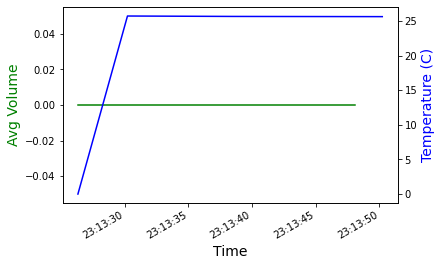

KeyboardInterrupt: 

In [57]:
for i in range(0,10):
    
    # Recording Audio
    timeStamp = time_ns()
    sample = getAudioSample(2)
    avgAmp = np.average(np.absolute(sample))
    audioData = np.append(audioData, [[timeStamp, avgAmp]], axis=0)
    
    # Collecting Enviornmental Data
    timeStamp = time_ns()
    enviData = getTempSample(2)
    avgTemp = np.average(enviData)
    tempData = np.append(tempData, [[timeStamp, avgTemp]], axis=0)
    
    fig,ax = plt.subplots()
    ax.plot(vToDate(audioData[0:, 0]), audioData[0:,1], color="green", label='Avg')
    ax.set_xlabel("Time",fontsize=14)
    ax.set_ylabel("Avg Volume",color="green",fontsize=14)

    ax2=ax.twinx()
    ax2.plot(vToDate(tempData[0:, 0]), tempData[0:,1], color="blue")
    ax2.set_ylabel("Temperature (C)",color="blue",fontsize=14)
    plt.gcf().autofmt_xdate()
    plt.show()